In [1]:
import pyreadr
import os
import pytimetk as tk

In [2]:
# pip install pytimetk --upgrade

In [3]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = r'C:\Users\User\Documents\Atividades_andamento\Nayana\corrige_codigos'
os.chdir(path)

In [6]:
#df =pd.read_excel('custos_versao_jun_17_2023.xlsx')
df =pd.read_excel("custos_versao_mar_14B_2024.xlsx")
df = df.drop(['Local','Barragens'],axis=1)
names = df.columns

In [7]:
name = 'Ano de encerramento da operação da estrutura?'
df = df.rename(columns={name: 'YearClose'})

In [8]:
data_clean  = df
data_clean 

,Dams,Area,Height,Volume,SuppStudSur,PreCloseRevDet,WastePiles,OpenPitMine,IndustAreas,StorageAreas,...,GeotecMon,DrainSysMon,ErosProcMon,GroundwaQMon,SurfWatQuaMon,VegetPerfMon,FaunaMon,DrainSysMain,ErosProcMain,RevegMain
0,2.315010e+07,216.0000,57.00,42400000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,0,1,0,1,1,1
1,3.093551e+07,242.0000,72.00,53600000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,1,1,0,1,1,1
2,4.964595e+06,30.0000,53.56,12000000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,0,1,0,1,1,1
3,2.238110e+06,280.0000,65.00,18600000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,0,1,1,1,0,1,0,1
4,1.294021e+06,18.0000,25.00,1180000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,0,1,0,0,0,0,0
5,1.155955e+05,6.6000,13.00,73335,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,0,1,0,0,0,0,0
6,1.147483e+05,1.3000,8.00,33615,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,0,1,0,0,0,0,0
7,3.595741e+04,90.0000,23.50,12000000,589561.855670,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,0,0,0,0,0,1,1,0,0,1
8,1.971937e+06,89.0000,50.00,7150000,211420.747423,7.561346e+05,4.059312e+06,1.007038e+06,1.523932e+07,2.855369e+06,...,1,1,0,1,1,1,1,1,0,1
9,2.091747e+06,108.7000,110.00,17620000,211420.747423,7.561346e+05,4.059312e+06,1.007038e+06,1.523932e+07,2.855369e+06,...,1,1,0,1,1,1,1,1,0,1


In [9]:
data_clean.head(3)

,Dams,Area,Height,Volume,SuppStudSur,PreCloseRevDet,WastePiles,OpenPitMine,IndustAreas,StorageAreas,...,GeotecMon,DrainSysMon,ErosProcMon,GroundwaQMon,SurfWatQuaMon,VegetPerfMon,FaunaMon,DrainSysMain,ErosProcMain,RevegMain
0,2.315010e+07,216.0,57.00,42400000,589561.85567,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,0,1,0,1,1,1
1,3.093551e+07,242.0,72.00,53600000,589561.85567,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,1,1,0,1,1,1
2,4.964595e+06,30.0,53.56,12000000,589561.85567,1.068292e+06,4.525922e+06,3.457263e+06,1.673361e+07,1.430158e+06,...,1,1,1,1,0,1,0,1,1,1


In [10]:
# data_clean['job'].unique()

In [11]:
cols = data_clean.columns

In [12]:
numerical = []
for col in cols:
    #print(data_clean[col].dtypes)
    if data_clean[col].dtypes != 'string':
        numerical.append(col)
    #print(col)

In [13]:
numerical

['Dams',
 'Area',
 'Height',
 'Volume',
 'SuppStudSur',
 'PreCloseRevDet',
 'WastePiles',
 'OpenPitMine',
 'IndustAreas',
 'StorageAreas',
 'AdmSupInfra',
 'PondsTanks',
 'OverallCosts',
 'PostCloseMonitor',
 'PostCloseMain',
 'StruOper',
 'YearClose',
 'AreaRec',
 'GeoteAvai',
 'TopAvai',
 'SSEO',
 'FoSAccep',
 'FWorTeOP',
 'EroEO',
 'LakeEO',
 'SPIorPUMP',
 'GeochAvai',
 'ContSoil',
 'ContGrouWat',
 'ContMat',
 'MobCont',
 'HealthRisk',
 'EcoRisck',
 'Plann',
 'AsBuilt',
 'RemovStruc',
 'DemStruc',
 'LowPermSubBarr',
 'CapiBarCov',
 'EstabTrafLay',
 'LowPermCov',
 'ImpermCov',
 'ImplBottLin',
 'RemoContSoil',
 'DevWater',
 'SedDredg',
 'EfflTreat',
 'ResDep',
 'BreaOpen',
 'RemovEmbank',
 'MatHand',
 'TopReshap',
 'ReshapSlop',
 'ReinfEmbank',
 'AcceSeal',
 'AccePlug',
 'TulipPlu',
 'SpillConstr',
 'SupDrainAdeq',
 'EroProCON',
 'SoilScari',
 'TosoPlac',
 'SoilPrep',
 'Revege',
 'FencInst',
 'ConsProtBerm',
 'SignInst',
 'OthClosAct',
 'GeotecMon',
 'DrainSysMon',
 'ErosProcMon',
 'G

In [14]:
cols = numerical

In [15]:
df = df.rename(columns={'A': 'X', 'B': 'Y'})

In [16]:
# Create a DataFrame
cols = numerical
df = data_clean[cols]

# Binarize the data
df_binarized = df.binarize(n_bins=4, thresh_infreq=0.01, name_infreq="-OTHER", one_hot=True)

df_binarized.glimpse()     

# Add the target column back
df_binarized['Dams'] = data_clean['Dams']

<class 'pandas.core.frame.DataFrame'>: 33 rows of 184 columns
Dams__3199.8_115595.5:                int32             [0, 0, 0, 0, 0,  ...
Dams__115595.5_1294021.3:             int32             [0, 0, 0, 0, 1,  ...
Dams__1294021.3_3857935.5:            int32             [0, 0, 0, 1, 0,  ...
Dams__3857935.5_30935507.3:           int32             [1, 1, 1, 0, 0,  ...
Area__0.1_3.5:                        int32             [0, 0, 0, 0, 0,  ...
Area__3.5_30.0:                       int32             [0, 0, 1, 0, 1,  ...
Area__30.0_108.7:                     int32             [0, 0, 0, 0, 0,  ...
Area__108.7_856.0:                    int32             [1, 1, 0, 1, 0,  ...
Height__1.0_13.0:                     int32             [0, 0, 0, 0, 0,  ...
Height__13.0_23.0:                    int32             [0, 0, 0, 0, 0,  ...
Height__23.0_53.6:                    int32             [0, 0, 1, 0, 1,  ...
Height__53.6_110.0:                   int32             [1, 1, 0, 1, 0,  ...
Volume__0.0_33

In [17]:
df_correlated = df_binarized.correlate(target='Dams')
df_correlated.head(10)

,feature,bin,correlation
184,Dams,None,1.000000
135,ReshapSlop,0,-0.840645
83,SSEO,1,-0.840645
82,SSEO,0,0.840645
136,ReshapSlop,1,0.840645
3,Dams,3857935.5_30935507.3,0.772280
137,ReinfEmbank,0,-0.760941
138,ReinfEmbank,1,0.760941
98,ContGrouWat,0,-0.712967
99,ContGrouWat,1,0.712967


In [30]:
pd.set_option("display.max_rows", None)

In [31]:
df_correlated

,feature,bin,correlation
184,Dams,None,1.000000
135,ReshapSlop,0,-0.840645
83,SSEO,1,-0.840645
82,SSEO,0,0.840645
136,ReshapSlop,1,0.840645
3,Dams,3857935.5_30935507.3,0.772280
137,ReinfEmbank,0,-0.760941
138,ReinfEmbank,1,0.760941
98,ContGrouWat,0,-0.712967
99,ContGrouWat,1,0.712967


In [28]:
# Interactive
df_correlated.plot_correlation_funnel(
    engine='plotly', limits=(-1.09, 1.05),
    height=1200, width=800,
)

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_point : Removed 14 rows containing missing values.

C:\Users\User\Anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_text : Removed 15 rows containing missing values.



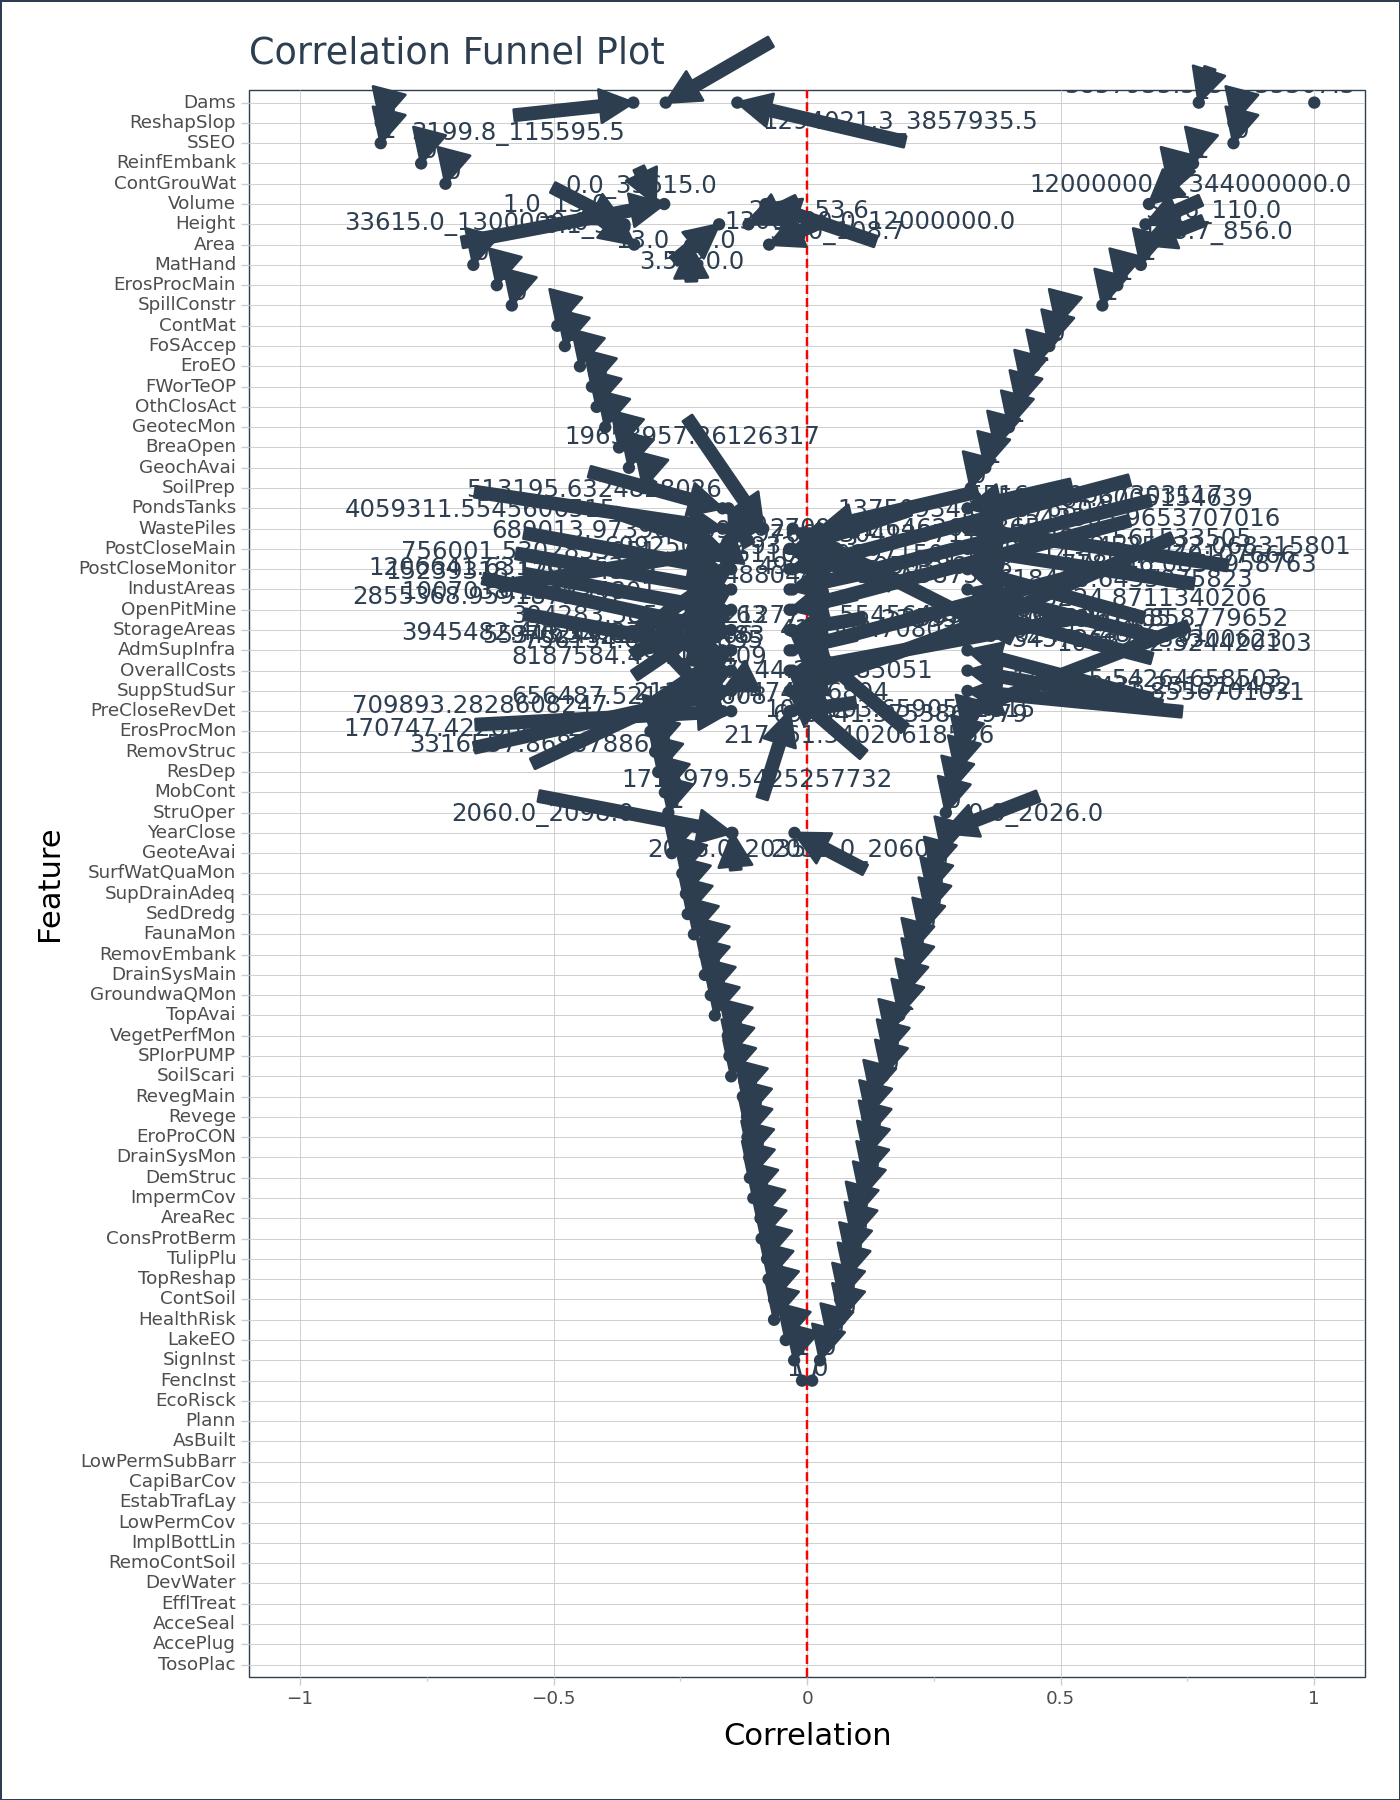

<Figure Size: (700 x 900)>

In [19]:
# Static
df_correlated.plot_correlation_funnel(
    engine ='plotnine', 
    height = 900
)